In [1]:
import pandas as pd
df = pd.DataFrame(columns=['calorie', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
df

,calorie,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [2]:
X = df[['calorie', 'breakfast', 'lunch', 'dinner', 'exercise']]
X

,calorie,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [3]:
Y = df[['body_shape']]
Y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [4]:
# 표준화
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X) # 전체 평균이 0이 됨
print(x_std.mean()) # average
print(x_std.std()) # standard deviation

3.552713678800501e-17
1.0


In [5]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [6]:
import numpy as np
features = x_std.T # T = Transpose
covariance_matrix = np.cov(features) #covariance
print(covariance_matrix)

[[ 1.11111111  0.88379717  0.76782385  0.89376551 -0.93179808]
 [ 0.88379717  1.11111111  0.49362406  0.81967902 -0.71721914]
 [ 0.76782385  0.49362406  1.11111111  0.40056715 -0.76471911]
 [ 0.89376551  0.81967902  0.40056715  1.11111111 -0.63492063]
 [-0.93179808 -0.71721914 -0.76471911 -0.63492063  1.11111111]]


In [7]:
x_std.T.dot(x_std)/9.0 # 9.0는 갯수 만큼 나눠줌 (행)

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [8]:
#고유벡터 찾기
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('eig val: \n', eig_vals)
print('eig vecs: \n', eig_vecs)

eig val: 
 [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eig vecs: 
 [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [9]:
eig_vals[0] / sum(eig_vals) # 첫번째 eig_vals은 전체 데이터에 가지고 있는 퍼센트

0.7318321731427545

In [10]:
projected_x = x_std.dot(eig_vecs.T[0]) # 내적
projected_x

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [11]:
result = pd.DataFrame(projected_x, columns = ['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


C:\Users\andyj\anaconda3\envs\abangues\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

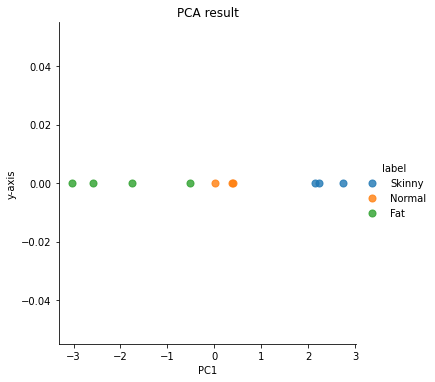

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, 
           scatter_kws={'s':50},
           hue="label")
plt.title('PCA result')

In [13]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943],
       [-0.0181432 ],
       [ 1.76296611],
       [-2.73542407],
       [ 3.02711544],
       [-2.14702579],
       [-0.37142473],
       [ 2.59239883],
       [-0.39347815],
       [ 0.50902498]])

C:\Users\andyj\anaconda3\envs\abangues\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

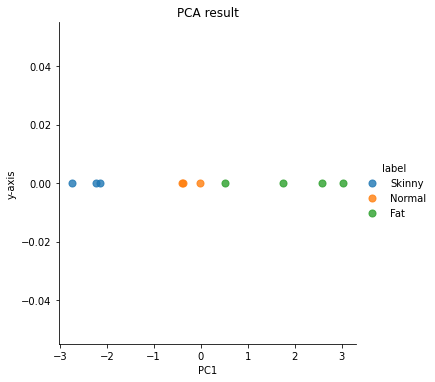

In [14]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
pca_result['y-axis'] = 0.0
pca_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=pca_result, fit_reg=False, 
           scatter_kws={'s':50},
           hue="label")
plt.title('PCA result')

In [15]:
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])

C:\Users\andyj\anaconda3\envs\abangues\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


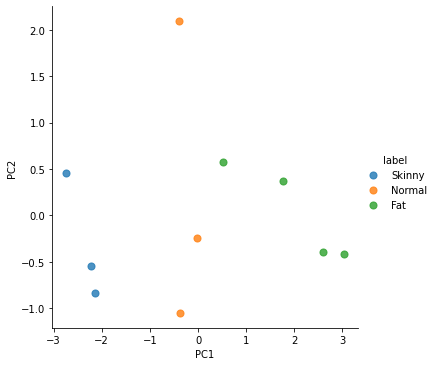

In [16]:
pca_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2'])
pca_result['label'] = Y

sns.lmplot('PC1', 'PC2', data=pca_result, fit_reg=False,
           scatter_kws = {"s":50},
           hue='label')

## SVD

In [17]:
import numpy as np

A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]
              ])

In [19]:
U, s, VT = np.linalg.svd(A)

print(f'U: \n{U}')
print(f's: \n{s}')
print(f'VT: \n{VT}')

U: 
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
s: 
[3.         2.23606798 2.         0.        ]
VT: 
[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


(275, 183)


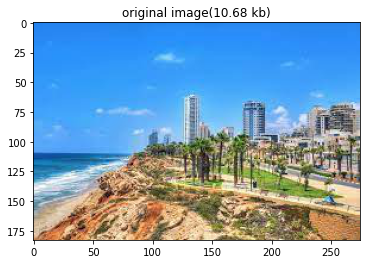

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

path = "netanya.jpg"
# 이미지를 받아서 그림
img = Image.open(path)
s = float(os.path.getsize(path))/1000
print(img.size)
plt.title("original image({:.2f} kb)".format(s))
plt.imshow(img)

In [12]:
imggray = img.convert('LA') #
imgmat = np.array(list(imggray.getdata(band=0)),float)

In [13]:
imgmat.shape

(50325,)

In [14]:
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
imgmat.shape

(183, 275)

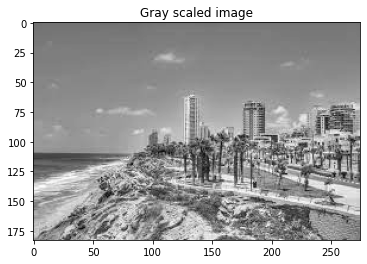

In [15]:
# 데이터를 받아서 matrix로 그림
plt.figure()
plt.imshow(imgmat, cmap='gray')
plt.title("Gray scaled image")
plt.show()

In [16]:
U, S, Vt = np.linalg.svd(imgmat)
S.shape

(183,)

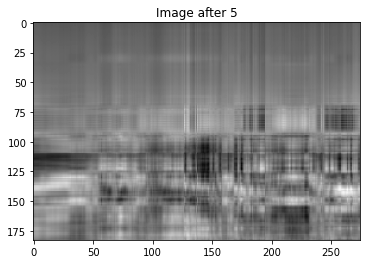

<PIL.Image.Image image mode=L size=275x183 at 0x1F543772C08>


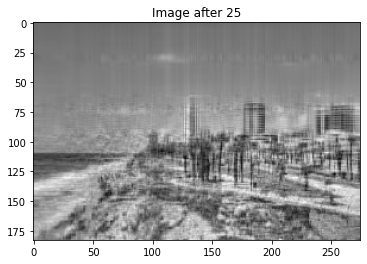

<PIL.Image.Image image mode=L size=275x183 at 0x1F543744B88>


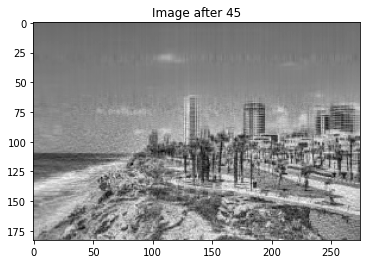

<PIL.Image.Image image mode=L size=275x183 at 0x1F543683BC8>


In [17]:
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i] * np.diag(S[:i])*np.matrix(Vt[:i, :]))
    plt.imshow(cmpimg, cmap='gray')
    title = "Image after {}".format(i)
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg).astype(np.uint8))
    print(result)